In [1]:
import random

import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

import tengp
from gpbenchmarks import get_data


def pdivide(x, y):
    return np.divide(x, y, out=np.copy(x), where=x!=0)

def plog(x, y):
    return np.log(x, out=np.copy(x), where=x>0)

def psin(x, y):
    return np.sin(x)

def pcos(x, y):
    return np.cos(x)

def pow2(x, y):
    return x**2

def pow3(x, y):
    return x**3

def ptan(x, y):
    return np.tan(x)

def ptanh(x, y):
    return np.tanh(x)

def psqrt(x, y):
    return  np.sqrt(x)

def pexp(x, y):
    return np.exp(x)

def inactive(x, y):
    return x

funset = tengp.FunctionSet()
funset.add(inactive, 2)
funset.add(np.add, 2)
funset.add(np.subtract, 2)
funset.add(np.multiply, 2)
funset.add(pdivide, 2)
funset.add(plog, 2)
funset.add(psin, 2)
funset.add(pcos, 2)

#     function set: +, -, *, /, sin, cos, tan, tanh, sqrt, exp, log, **2, **3
ext_funset = tengp.FunctionSet()
ext_funset.add(inactive, 2)
ext_funset.add(np.add, 2)
ext_funset.add(np.subtract, 2)
ext_funset.add(np.multiply, 2)
ext_funset.add(pdivide, 2)
ext_funset.add(psin, 2)
ext_funset.add(pcos, 2)
ext_funset.add(ptan, 2)
ext_funset.add(ptanh, 2)
ext_funset.add(psqrt, 2)
ext_funset.add(pexp, 2)
ext_funset.add(plog, 2)
ext_funset.add(pow2, 2)
ext_funset.add(pow3, 2)

params1d = tengp.Parameters(2, 1, 1, 50, funset, real_valued=True)
params2d = tengp.Parameters(3, 1, 1, 50, funset, real_valued=True)
params5d = tengp.Parameters(6, 1, 1, 50, ext_funset, real_valued=True)

functions = [('nguyenf4', params1d, [20, -1, 1]), ('nguyenf7', params1d, [20, 0, 2]), ('nguyenf10', params2d, [100, -1, 1]), ('korns12', params5d, [10000, -50, 50])]

In [2]:
import pygmo as pg

In [3]:
vectors = []
n_actives = []

class cost_function:
    def __init__(self, X, Y, params, bounds):
        self.params = params
        self.bounds = bounds
        self.X = X
        self.Y = Y
    
    def fitness(self, x):
        vectors.append(x)
        #x[-1] = round(x[-1])
        
        individual = tengp.individual.NPIndividual(
            list(x), self.bounds, self.params
        )
        
        pred = individual.transform(self.X)
        
        #n_actives.append(len(individual.active_nodes))
        
        try:
            return [mean_squared_error(pred, self.Y)]
        except ValueError:
            return [10000000000]
        
    def get_bounds(self):
        lower = [0]*len(self.bounds)
        lower[-1] = self.bounds[-1]
        return (lower, [b for b in self.bounds])

In [4]:
%%time
results = []
champions = []

for f in functions:
    print(f[0])
    x, y = get_data(f[0], *f[2])
    x = np.c_[np.ones(len(x)), x]
    bounds = tengp.individual.IndividualBuilder(f[1]).create().bounds[:]

    prob = pg.problem(cost_function(x, y, f[1], bounds))
    
    problem_results = []
    pg.set_global_rng_seed(42)
    for i in range(10):
        print(i, end=', ')
        algo = pg.algorithm(pg.pso(
            gen=50
        ))
        algo.set_verbosity(1)
        pop = pg.population(prob, 100)
        pop = algo.evolve(pop)
        problem_results.append(pop.champion_f[0])
        champions.append(pop.champion_x)
    results.append(problem_results)
    

nguyenf4
0, 

/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in sin
/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:103: RuntimeWarning: invalid value encountered in add
  return l + u
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:99: RuntimeWarning: invalid value encountered in add
  L = (1-b)*x_l1 + b*x_u1
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:100: RuntimeWarning: invalid value encountered in add
  U = (1-c)*x_l2 + c*x_u2
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:99: RuntimeWarning: invalid value encountered in multiply
  L = (1-b)*x_l1 + b*x_u1
/mnt/c/Users/jarinov-no

1, 

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:102: RuntimeWarning: invalid value encountered in multiply
  u = a*f_u(L, U)


2, 

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:102: RuntimeWarning: invalid value encountered in add
  u = a*f_u(L, U)


3, 

KeyboardInterrupt: 

In [173]:
def plot_results(outs):
    costs = np.array(outs)
    print('mean:', np.mean(costs))
    print('median:', np.median(costs))
    print('variance:',np.var(costs))
    print('min:', np.min(costs))
    sns.distplot(costs);

Nguyen4
mean: 0.3261489058853295
median: 0.2455179546151192
variance: 0.06944865745216841
min: 0.0419238638220459


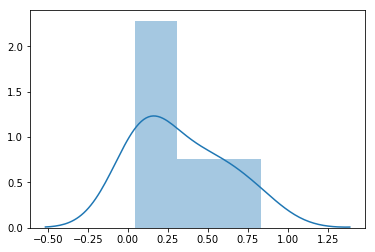

In [174]:
print('Nguyen4')
plot_results(results[0])

Nguyen7
mean: 0.0011999202111524381
median: 0.0012423290633790357
variance: 7.168211595245975e-08
min: 0.0007858222643821369


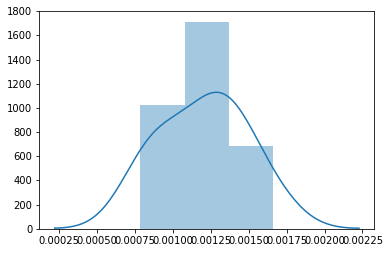

In [163]:
print('Nguyen7')
plot_results(results[1])

Nguyen10
mean: 0.04180936785072993
median: 0.04643772269945377
variance: 0.0002466214016571673
min: 0.01262943201035289


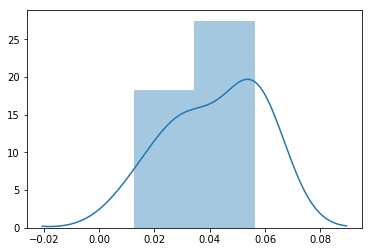

In [164]:
print('Nguyen10')
plot_results(results[2])

Korns12
mean: 1.8842483164331632
median: 1.9462836957954484
variance: 0.19279355527560257
min: 1.4163444673183674


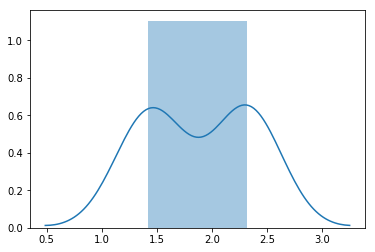

In [165]:
print('Korns12')
plot_results(results[3])

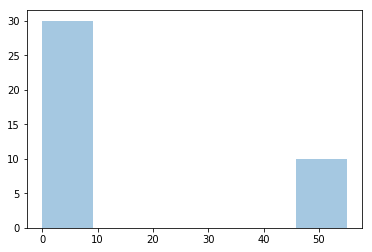

In [166]:
import seaborn as sns

sns.distplot([x[-1] for x in champions], kde=False)

In [167]:
data = np.array([(x[-1], f) for x, f in zip(champions, np.array(results).flatten())])

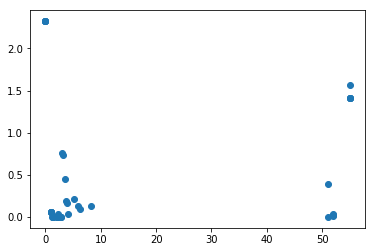

In [168]:
plt.scatter(data[:, 0], data[:, 1])